In [49]:
import sys
sys.path.append("../")

import datarun
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import voigt_profile
from scipy.optimize import curve_fit
from scipy.special import wofz
#error propagation
from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties.umath import *

In [5]:
data = datarun.Experiment(
    datapath=os.path.join(os.getcwd(),'linewidth'),
    idx_start=32,
    vstart=.3,
    vend=1.0,
    vstep=.175,
    numtrials=25,
    mask=.15
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:164: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:164: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


|████████████████████████████████████████| 125/125 [100%] in 3:33.9 (0.58/s)                                            


In [11]:
# def od_max(run):
#     return run.popt_x[0]-run.popt_x[3]

# str_dat = data.structure_data(od_max)
str_dat=data.structure_data(lambda d: d.atom_number())

In [12]:
for dat in str_dat.values():
    mean = np.mean(dat)
    std = np.std(dat)
    for val in dat:
        if np.abs(val - mean) > 2*std:
            dat.remove(val)
            print("removed")
    print(dat)

removed
[19371672.946700428, 20104452.951976355, 27593199.929166067, 22913193.691447202, 16627628.33080039, 18509656.51617704, 41167610.867946036, 17408633.830071297, 25159248.489937227, 27048546.141880114, 21353791.530306168, 19631703.540105253, 18391683.503017176, 20686201.21289424, 31627196.951025262, 18882104.31577717, 19346695.71540739, 19071162.898631383, 19392363.21229466, 22569988.520379536, 18790583.49605165, 22579862.886405952, 16101515.932905454]
removed
removed
[37077809.65451511, 45761551.30508637, 36572708.174151964, 29841302.588959575, 40446815.18888762, 46680987.85482186, 44369498.12626927, 45996013.3427211, 37035812.57236509, 40553554.722661294, 25634222.266979586, 36595046.6141578, 48311211.27552742, 47850846.07669555, 35570886.17486017, 36801336.51029167, 37349450.09864359, 32489648.997836336, 41205542.53168823, 43392991.08766385, 32240866.63885023, 36651283.77646199]
[57873172.10193433, 65120833.5515481, 56922730.41272635, 56997169.57513422, 56187225.13758538, 55636

In [44]:
# def lorentzian(x, A, w0, gamma):
#     return (A*gamma/2*np.pi)/((x-w0)**2+gamma**2/4)

# def gaussian(x, A, mu, sigma):
#     return A*np.exp(-(x-mu)**2/(2*sigma**2))

# def voigt(x, A, mu, gamma, sigma):
#     return A*np.real(wofz(((x-mu) + 1j*gamma)/sigma/np.sqrt(2))) / sigma

def voigt(x,A,mu,sigma):
    return A*voigt_profile(x-mu,sigma,0.247)

In [48]:
means = np.fromiter(map(np.mean, str_dat.values()), float)
errs = np.fromiter(map(np.std, str_dat.values()), float)/5
# popt_g, pcov_g = curve_fit(gaussian, data.vlist, means, sigma = errs, p0 = [20, .7, 1], absolute_sigma=True)
popt_v, pcov_v = curve_fit(voigt, data.vlist, means, sigma = errs, p0 = [56997169.57513422, .7, 1], absolute_sigma=True)
# popt_l, pcov_l = curve_fit(lorentzian, data.vlist, means, sigma = errs, p0 = [20, .7, 1], absolute_sigma=True)
popt_v
dt_err=np.sqrt(pcov_v[2,2])

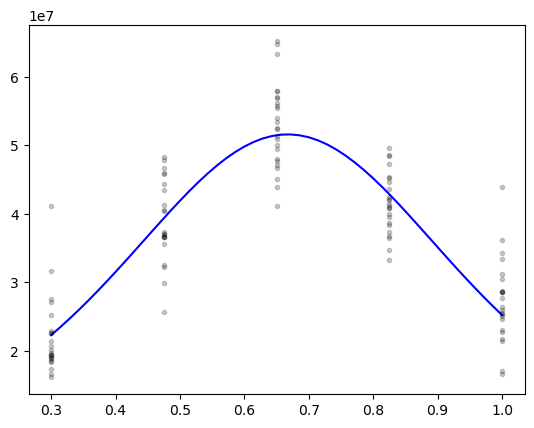

In [46]:
xax = np.linspace(min(data.vlist), max(data.vlist), 50)
# plt.plot(xax, [voigt(x, *popt_v)/popt_l[0] for x in xax], color = "b")
plt.plot(xax,voigt(xax,*popt_v),'-b')
# plt.errorbar(data.vlist, means/popt_l[0], yerr = errs, linestyle = "None", color = "r", capsize=10)
for key in str_dat:
    y_plot=str_dat[key]
    plt.plot([key]*len(y_plot),y_plot,'.k', alpha=0.2)
# for dat in data.data:
#     # plt.scatter(dat.value, od_max(dat)/popt_l[0], color = "k", alpha=.2, marker = "o")
#     plt.scatter(dat.value, np.mean(dat), color = "k", alpha=.2, marker = "o")


In [50]:
dt=ufloat(popt_v[2],dt_err)*ufloat(6.1,0.1)*1e6*2
temp=(dt*299792458/(2*3.89286058716e14))**2*39.0983e-3/(2*np.log(2)*8.3145)
temp

0.0013235036959632642+/-0.00023784803610923678